In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
sns.set(font_scale=1.5)
%matplotlib inline

In [33]:
root = './data/savedata/'
namelist = os.listdir(root)
pkglist = [i for i in namelist if '.' not in i]
mdllist = [i for i in os.listdir(os.path.join(root, pkglist[1],'model')) 
           if '.' not in i]
path = root + '%s/model/%s/lr0.0001bs300decay0.0001epoch1000/%d'

In [83]:
df = pd.DataFrame(columns={'pkgname', 'model', 'ID', 'accuracy'})
lidx = 0
for pkg in pkglist:
    for mdl in mdllist:
        for idx in range(1,7):
            tpath = path % (pkg, mdl, idx)
            outfile = os.path.join(tpath, 'acc.csv')
            val = pd.read_csv(outfile).iloc[:,-1].values
            df = df.append(pd.Series({'pkgname':pkg,
                                      'model':mdl,
                                      'ID':idx,
                                      'accuracy':float(val)}), 
                           ignore_index=True)

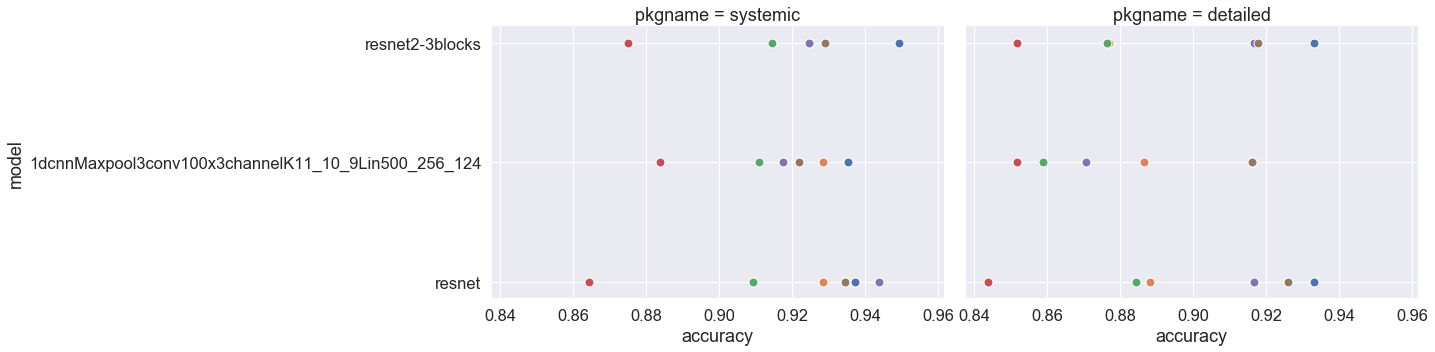

In [94]:
g = sns.FacetGrid(df,  col="pkgname", hue='ID',height=5, aspect=2)
g = g.map(plt.scatter, "accuracy", "model", edgecolor="w", s=80)
g.savefig("./Figs/accuracy_cmp.pdf")